# Sprintbot encoder analysis
### Data from the first sprintbot tests 12/10/20

In [1]:
import numpy as np
import cv2 as cv
import glob
import pickle
import pandas as pd
import json

In [54]:
fname = '/home/rugged/work/data/sprint2_121020/json_test_lines.json'

data = []
with open(fname) as f:
    for line in f:
        data.append(json.loads(line))

        
sbot = pd.DataFrame(data)
sbot

,wheel2Revs,temp_oC,wheel1Pos,elapsedTime,pressure_kPa,imu,wheel2Pos,wheel1Revs,humidity_percent
0,-175,16.62738,-832,0.087,100.7898,"[-72.94969, 74.52534, 116.5186]",-768,-174,74.09607
1,-175,16.66338,-832,1.103,100.7466,"[-72.12151, 74.7004, 117.1975]",-768,-174,74.14125
2,-175,16.62738,-832,2.113,100.7754,"[-73.54123, 74.19148, 115.7025]",-768,-174,74.02431


In [57]:
fname = '/home/rugged/work/data/sprint2_121020/json_test_brackets.json'
with open(fname) as json_file:
    data = json.load(json_file)
    
sbot = pd.DataFrame(data)
sbot

,wheel2Revs,temp_oC,wheel1Pos,elapsedTime,pressure_kPa,imu,wheel2Pos,wheel1Revs,humidity_percent
0,-175,16.62738,-832,0.087,100.7898,"[-72.94969, 74.52534, 116.5186]",-768,-174,74.09607
1,-175,16.66338,-832,1.103,100.7466,"[-72.12151, 74.7004, 117.1975]",-768,-174,74.14125
2,-175,16.62738,-832,2.113,100.7754,"[-73.54123, 74.19148, 115.7025]",-768,-174,74.02431


In [2]:
fname = '/home/rugged/work/data/sprint2_121020/20201009-183258-sprintbot-data_pipe_loop3_dark.txt'
with open(fname, 'r') as infile:
    data = infile.read()
    new_data = data.replace('}{', '},{')
    json_data = json.loads(f'[{new_data}]')
    
sbot = pd.DataFrame(json_data)
sbot

,wheel2Revs,temp_oC,wheel1Pos,elapsedTime,pressure_kPa,imu,wheel2Pos,wheel1Revs,humidity_percent
0,-175,16.62738,-832,0.087,100.7898,"[-72.94969, 74.52534, 116.5186]",-768,-174,74.09607
1,-175,16.66338,-832,1.103,100.7466,"[-72.12151, 74.7004, 117.1975]",-768,-174,74.14125
2,-175,16.62738,-832,2.113,100.7754,"[-73.54123, 74.19148, 115.7025]",-768,-174,74.02431
3,-175,16.66338,-832,3.122,100.7852,"[-72.80452, 74.4672, 116.2858]",-768,-174,73.97646
4,-175,16.66338,-832,4.132,100.7919,"[-72.01268, 74.55553, 116.9237]",-768,-174,74.05886
...,...,...,...,...,...,...,...,...,...
178,-213,17.67154,-217,181.931,100.7879,"[-114.6752, 69.8989, 75.73215]",-354,-214,71.47809
179,-213,17.65353,-217,182.948,100.7854,"[-118.3089, 66.66624, 74.83882]",-458,-214,71.48074
180,-213,17.67154,-217,183.960,100.7839,"[-110.208, 65.33884, 83.64166]",-459,-214,71.40367
181,-213,17.67154,-217,184.971,100.7214,"[-109.644, 65.17921, 84.05967]",-459,-214,71.41962


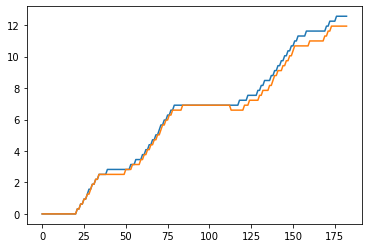

In [71]:
from matplotlib import pyplot as plt
# plt.plot(sbot.wheel1Revs[170:183])
# plt.plot(sbot.wheel2Revs[170:183])

plt.plot(wheel1)
plt.plot(wheel2)
# plt.axis('equal')

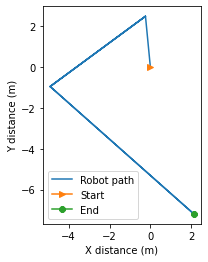

In [139]:
# ORIGINAL CODE
# compute distance traveled and heading
# http://seattlerobotics.org/encoder/200610/Article3/IMU%20Odometry,%20by%20David%20Anderson.htm

# note I believe both wheels are encoded the same, so one is going 'backwards' and needs flipping
# wheel 2 then wheel 1 orientation seems to give correct rotation directions
wheelbase = 0.08 # 80mm in meters. had been set to .45
diameter = 0.2

# turn revs into distance, based on 200mm diameter wheels
wheel1 = (sbot.wheel1Revs-sbot.wheel1Revs[0])/2 * diameter * np.pi
wheel2 = (sbot.wheel2Revs-sbot.wheel2Revs[0])/2 * diameter * np.pi

distance = ((sbot.wheel2Revs-sbot.wheel2Revs[0])/2 + -(sbot.wheel1Revs-sbot.wheel1Revs[0])/2)/ 2.0
theta = ((sbot.wheel2Revs-sbot.wheel2Revs[0])/2 - (sbot.wheel1Revs-sbot.wheel1Revs[0])/2) / 0.45

# distance = (wheel2 + -wheel1)/ 2.0
# theta = (wheel1 - wheel2)/ wheelbase

X_position = distance * np.cos(1.5*theta)
Y_position = distance * np.sin(1.5*theta) # was 1.5*theta

fig = plt.figure()
plt.plot(10*X_position,10*Y_position)
# plt.axis('equal')

# plot markers
endpoint = 158
plt.plot(10*X_position[0],10*Y_position[0],marker=">")
plt.plot(10*X_position[endpoint],10*Y_position[endpoint],marker="8")


plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_xlabel('X distance (m)')
plt.gca().set_ylabel('Y distance (m)')
plt.legend(('Robot path','Start','End'))
plt.draw()

# plt.plot(Y_position)
fig.savefig('encoder_trajectory_scaled_labelled.png', bbox_inches='tight')

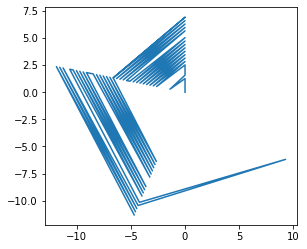

In [138]:
# Updated code to try and get near real world units. Two longer straight bits are 3m lengths


wheelbase = 0.08 # 80mm in meters. had been set to .45
diameter = 0.2

# turn revs into distance, based on 200mm diameter wheels. Flipped to positive
wheel1 = -(sbot.wheel1Revs-sbot.wheel1Revs[0])/2 * diameter * np.pi
wheel2 = -(sbot.wheel2Revs-sbot.wheel2Revs[0])/2 * diameter * np.pi

# forcing one side negative. Seems necessary but not sure why...
distance = (wheel1 + wheel2)/ 2.0
theta = (wheel1 - wheel2)/ wheelbase

scale = 1.25
X_position = distance * np.sin(scale*theta)
Y_position = distance * np.cos(scale*theta) # was 1.5*theta

fig = plt.figure()
plt.plot(X_position,Y_position)
# plt.axis('equal')

plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

# plt.plot(Y_position)
# fig.savefig('encoder_trajectory.png', bbox_inches='tight')

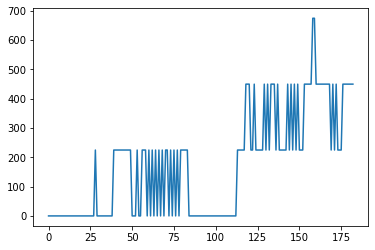

In [77]:
# multiply theta by 180/pi to get heading in degrees
plt.plot((180/np.pi)*theta) 

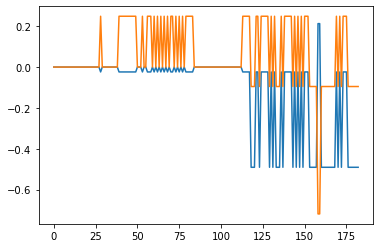

In [97]:
plt.plot(X_position)
plt.plot(Y_position)
X_position?

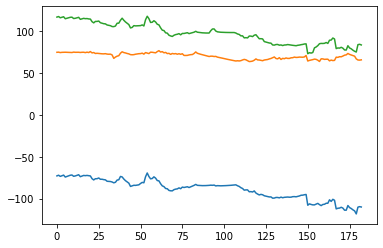

In [12]:
# IMU
IMU = sbot.imu
x = [x for x,y,z in IMU]
y = [y for x,y,z in IMU]
z = [z for x,y,z in IMU]
plt.plot(x)
plt.plot(y)
plt.plot(z)

In [81]:
IMU.values


array([list([-72.94969, 74.52534, 116.5186]),
       list([-72.12151, 74.7004, 117.1975]),
       list([-73.54123, 74.19148, 115.7025]),
       list([-72.80452, 74.4672, 116.2858]),
       list([-72.01268, 74.55553, 116.9237]),
       list([-74.32523, 74.60195, 114.5657]),
       list([-73.61317, 74.53983, 115.1218]),
       list([-72.87214, 74.5678, 115.7095]),
       list([-72.15561, 74.54759, 116.2841]),
       list([-71.89186, 74.25528, 116.4175]),
       list([-73.42074, 74.73595, 114.8073]),
       list([-72.98635, 74.52134, 115.1029]),
       list([-72.27072, 74.5559, 115.6672]),
       list([-71.5598, 74.55787, 116.2251]),
       list([-73.88409, 74.33118, 113.8584]),
       list([-73.12466, 74.53689, 114.4534]),
       list([-72.40476, 74.58638, 115.0214]),
       list([-72.6533, 74.15298, 114.6431]),
       list([-72.38028, 74.66927, 114.775]),
       list([-72.73009, 74.21413, 114.3177]),
       list([-73.00503, 75.39504, 114.1623]),
       list([-76.25179, 73.80145, 111.070

In [153]:
X_position


0      0.00000
1      0.00000
2      0.00000
3      0.00000
4      0.00000
        ...   
178    0.30316
179    0.30316
180    0.30316
181    0.30316
182    0.30316
Length: 183, dtype: float64

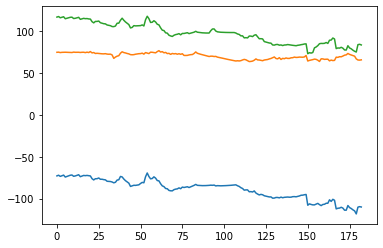